# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [ ]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
annual_housing_unit = (
    sfo_data[["housing_units"]]
    .groupby(sfo_data.index)
    .mean()
)
annual_housing_unit

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


In [5]:
# Save the dataframe as a csv file
annual_housing_unit.to_csv("./annual_housing_unit.csv")

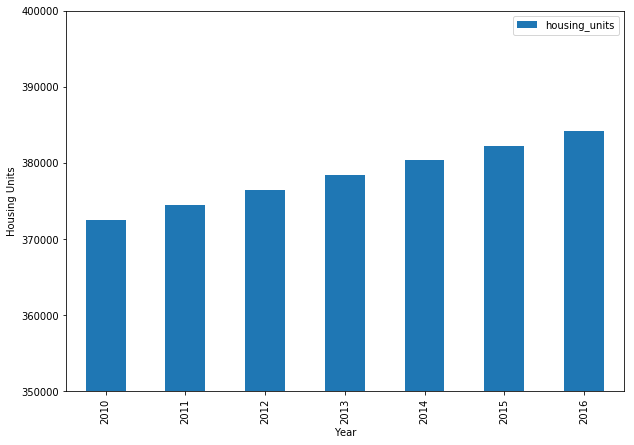

In [6]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# YOUR CODE HERE!

#annual_housing_unit.hvplot.bar(ylim=(300000,400000))
annual_housing_unit.plot.bar(ylim=(350000,400000), xlabel="Year", ylabel='Housing Units', figsize=(10,7))

- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [7]:
# Calculate the average sale price per square foot and average gross rent
average_housing_unit = (
    sfo_data[["sale_price_sqr_foot","gross_rent"]]
    .groupby(sfo_data.index)
    .mean()
)
average_housing_unit
#average_housing_unit.plot.line()

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528
2015,632.540352,3739
2016,697.643709,4390


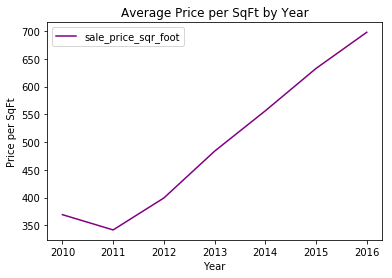

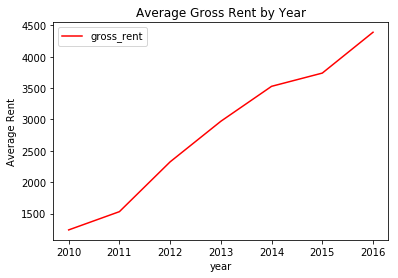

In [48]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
average_housing_unit.plot.line(
    y="sale_price_sqr_foot", 
    title ="Average Price per SqFt by Year", 
    ylabel="Price per SqFt", 
    xlabel = 'Year',
    color='purple',
    fontsize= 10)

# Line chart for average montly rent
average_housing_unit.plot.line(
    y="gross_rent", 
    title ="Average Gross Rent by Year", 
    ylabel="Average Rent", 
    color="red")


- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [49]:
# Group by year and neighborhood and then create a new dataframe of the mean values
neighborhood_df = (
     sfo_data[["neighborhood","sale_price_sqr_foot","housing_units","gross_rent"]]
     .groupby([sfo_data.index,"neighborhood"])
     .mean()
     .reset_index()
)
neighborhood_df.head()

,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,2010,Alamo Square,291.182945,372560,1239
1,2010,Anza Vista,267.932583,372560,1239
2,2010,Bayview,170.098665,372560,1239
3,2010,Buena Vista Park,347.394919,372560,1239
4,2010,Central Richmond,319.027623,372560,1239


In [50]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood

neighborhood_df.hvplot.line(
    "year",
    "sale_price_sqr_foot",
    xlabel="Year",
    ylabel="Avg. Sale Price per Square Foot",
    groupby="neighborhood",
)



BokehModel(combine_events=True, render_bundle={'docs_json': {'8fd8ef45-a8ff-49d9-8deb-0273342fa1c7': {'defs': …

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

In [75]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
neighborhood_df.hvplot.line(
    x =  "year",
    y = "gross_rent",
    xlabel="Year",
    ylabel="Avg. Gross Rent",
    groupby="neighborhood",
)


BokehModel(combine_events=True, render_bundle={'docs_json': {'b841322e-6c57-44e3-9e7d-04b396b9a219': {'defs': …

:DynamicMap   [neighborhood]
   :Curve   [year]   (gross_rent)

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [52]:
# Getting the data from the top 10 expensive neighborhoods to own
neighborhood_df_mean=sfo_data.groupby(by="neighborhood").mean()
neighborhood_df_10= neighborhood_df_mean.sort_values(by="sale_price_sqr_foot", ascending=False).head(10)
neighborhood_df_10

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [74]:
# Plotting the data from the top 10 expensive neighborhoods
neighborhood_df_10.hvplot.bar(
    x = "neighborhood",
    y = "sale_price_sqr_foot",
    xlabel="Neighborhood",
    ylabel="Avg. Sale Price per Square Foot",
    rot=90,
    ylim = (0,1200),
    fontsize = 10, 
    title = "Top 10 Expensive Neighborhoods in SFO"
)

:Bars   [neighborhood]   (sale_price_sqr_foot)

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [76]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
neighborhood_df.hvplot.bar(
    "year",
   ["gross_rent","sale_price_sqr_foot"] ,
   stacked=False,
    ylabel="Num Housing Units",
    xlabel= "Neighborhood",
    rot=90,
    groupby="neighborhood",
) 


BokehModel(combine_events=True, render_bundle={'docs_json': {'be182ec8-8908-439a-bda5-113348ad0963': {'defs': …

:DynamicMap   [neighborhood]
   :Bars   [year,Variable]   (value)

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [77]:
# Load neighborhoods coordinates data

# Read in data
df = pd.read_csv(Path("./Data/neighborhoods_coordinates.csv")).drop_duplicates()
location_to_plot = df[["Neighborhood", "Lat", "Lon"]]
location_latlon= location_to_plot.set_index("Neighborhood")
location_latlon

,Lat,Lon
Neighborhood,,
Alamo Square,37.791012,-122.402100
Anza Vista,37.779598,-122.443451
Bayview,37.734670,-122.401060
Bayview Heights,37.728740,-122.410980
Bernal Heights,37.728630,-122.443050
...,...,...
West Portal,37.740260,-122.463880
Western Addition,37.792980,-122.435790
Westwood Highlands,37.734700,-122.456854


### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [78]:
# Calculate the mean values for each neighborhood
neighborhood_mean=sfo_data.groupby(by="neighborhood").mean()
neighborhood_mean

,sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Alamo Square,366.020712,378401.00,2817.285714
Anza Vista,373.382198,379050.00,3031.833333
Bayview,204.588623,376454.00,2318.400000
Bayview Heights,590.792839,382295.00,3739.000000
Bernal Heights,576.746488,379374.50,3080.333333
...,...,...,...
West Portal,498.488485,376940.75,2515.500000
Western Addition,307.562201,377427.50,2555.166667
Westwood Highlands,533.703935,376454.00,2250.500000


In [79]:
# Join the average values with the neighborhood locations
joined_df = pd.concat([location_latlon,neighborhood_mean], axis=1)
joined_df=joined_df.reset_index()
joined_df_renamed=joined_df.rename(columns={"index":"Neighborhood"})
joined_df_renamed.dropna(inplace=True)
joined_df_renamed

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.00,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.00,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.00,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.00,3739.000000
5,Buena Vista Park,37.768160,-122.439330,452.680591,378076.50,2698.833333
...,...,...,...,...,...,...
68,West Portal,37.740260,-122.463880,498.488485,376940.75,2515.500000
69,Western Addition,37.792980,-122.435790,307.562201,377427.50,2555.166667
70,Westwood Highlands,37.734700,-122.456854,533.703935,376454.00,2250.500000
71,Westwood Park,37.734150,-122.457000,687.087575,382295.00,3959.000000


### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

In [80]:
# Set the mapbox access token
# Read the Mapbox API key

# path = "C:/users/garth/.env"
home = Path.home() / ".env"  # windows 1/2
load_dotenv(home)  # windows 2/2

map_box_api = os.getenv("MAPBOX_PUBLIC_TOKEN")

# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

# Create a scatter mapbox to analyze neighborhood info
# Plot Data
map_plot = px.scatter_mapbox(
    joined_df_renamed,  # replace with df to watch your computer slow to an absolute crawl!
    lat="Lat",
    lon="Lon",
    size="sale_price_sqr_foot",
    color="gross_rent",
    zoom=4,
    title = "Average Sale Price Per Square Foot and Gross Rent in San Francisco"
)

# Display the map
map_plot.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [81]:
# Fetch the data from all expensive neighborhoods per year.

df_expensive_neighborhoods=sfo_data.groupby(by=["neighborhood"]).mean().sort_values(by=["sale_price_sqr_foot"], ascending=False).head(10)
df_expensive_neighborhoods = df_expensive_neighborhoods.reset_index()

expensive_neighborhood = df_expensive_neighborhoods[["neighborhood"]]

df_expensive_neighborhoods_per_year = neighborhood_df[neighborhood_df["neighborhood"].isin(expensive_neighborhood["neighborhood"])].head()
df_expensive_neighborhoods_per_year


,year,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
7,2010,Cow Hollow,569.379968,372560,1239
31,2010,Miraloma Park,680.608729,372560,1239
41,2010,Pacific Heights,496.516014,372560,1239
46,2010,Potrero Hill,491.450004,372560,1239
47,2010,Presidio Heights,549.417931,372560,1239


### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


In [82]:
# Parallel Categories Plot
# Plot data using parallel_categories
neighborhood_df_10_categories = neighborhood_df_10.reset_index()
px.parallel_categories(
    neighborhood_df_10_categories,
    dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units","gross_rent"],
    color="sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        "neighborhood": "neighborhood",
        "sale_price_sqr_foot": "sale_price_sqr_foot",
        "housing_units": "housing_units",
        "gross_rent": "gross_rent"
    }  
)

In [83]:
# Parallel Coordinates Plot
neighborhood_df_10 = neighborhood_df_10.reset_index()
neighborhood_df_10_coordinates=neighborhood_df_10 .drop(columns="neighborhood")
px.parallel_coordinates(neighborhood_df_10_coordinates,color="sale_price_sqr_foot")

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

In [86]:
# Sunburst Plot
#df_expensive_neighborhoods_per_year.groupby(by=["year","neighborhood"])
sunburst_df =neighborhood_df[neighborhood_df["neighborhood"].isin(expensive_neighborhood["neighborhood"])]
sunburst_df

#df = px.data.tips()
fig = px.sunburst(sunburst_df, path=['year', 'neighborhood'], values='sale_price_sqr_foot', color='gross_rent')
fig.show()